# Titanic survival

## 1 . Problem definition
Predict the survival of people onboard the Titanic (binary classification)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import ensemble

## 2. Load data


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Extra info:
April 15, 1912
1502 deaths out of 2224 (passengers and crew) (32% survival rate)
not enough lifeboats
More likely to survive: women, children, upper-class

## 3. Exploratory Analysis

Familiarize with the data: nb of examples, nb of columns, data types, ranges of values, distributions, missing values

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


-> Columns containing NaN: Age, Cabin, Embarked, Fare

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Danbom, Mr. Ernst Gilbert",male,CA. 2343,G6,S
freq,1,577,7,4,644


-> Names are unique, Sex is binary, duplicate values for Tickets and Cabin

Look for NaN, zeros, typos, other possible classes at test time:

In [10]:
for set_name, data in [('training set', train_data), ('test set',test_data)]:
    print('\n' + '-'*15)
    print(set_name)
    print('-'*15)
    print('\nValues/Ranges:')
    print('  Pclass:  {}'.format(sorted(data.Pclass.unique())))
    print('  Sex:     {}'.format(data.Sex.unique()))
    print('  SibSp:   {}'.format(sorted(data.SibSp.unique())))
    print('  Parch:   {}'.format(sorted(data.Parch.unique())))
    print('  PassengerId:[{},{}]'.format(data.PassengerId.min(), data.PassengerId.max()))
    print('  Age:     [{},{}]'.format(data.Age.min(), data.Age.max()))
    print('  Fare:    [{},{}]'.format(data.Fare.min(), data.Fare.max()))
    print('  Embarked:{}'.format(data.Embarked.unique()))
    # print('Name :  {}'.format(data.Name.unique()))
    # print('Ticket :{}'.format(data.Ticket.unique()))
    # print('Cabin :{}'.format(data.Cabin.unique()))
    print('\nNaN counts:')
    for column_name in list(data.columns):
        nan_count = data[column_name].isna().sum()
        if nan_count != 0:
            print('  {}: {}'.format(column_name, nan_count))
    print('  No NaN in other columns')
    
    print('\nZero counts:')
    print('  Age:   {}'.format((data.Age == 0).sum()))
    print('  Ticket:{}'.format((data.Ticket == 0).sum()))
    print('  Fare:  {}'.format((data.Fare == 0).sum()))


---------------
training set
---------------

Values/Ranges:
  Pclass:  [1, 2, 3]
  Sex:     ['male' 'female']
  SibSp:   [0, 1, 2, 3, 4, 5, 8]
  Parch:   [0, 1, 2, 3, 4, 5, 6]
  PassengerId:[1,891]
  Age:     [0.42,80.0]
  Fare:    [0.0,512.3292]
  Embarked:['S' 'C' 'Q' nan]

NaN counts:
  Age: 177
  Cabin: 687
  Embarked: 2
  No NaN in other columns

Zero counts:
  Age:   0
  Ticket:0
  Fare:  15

---------------
test set
---------------

Values/Ranges:
  Pclass:  [1, 2, 3]
  Sex:     ['male' 'female']
  SibSp:   [0, 1, 2, 3, 4, 5, 8]
  Parch:   [0, 1, 2, 3, 4, 5, 6, 9]
  PassengerId:[892,1309]
  Age:     [0.17,76.0]
  Fare:    [0.0,512.3292]
  Embarked:['Q' 'S' 'C']

NaN counts:
  Age: 86
  Fare: 1
  Cabin: 327
  No NaN in other columns

Zero counts:
  Age:   0
  Ticket:0
  Fare:  2


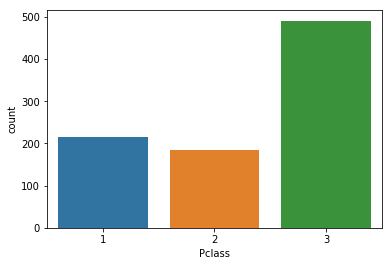

In [11]:
sns.countplot(train_data.Pclass.fillna(value='missing'));

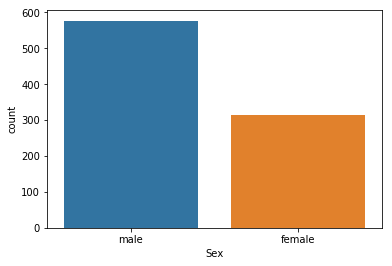

In [12]:
sns.countplot(train_data.Sex.fillna(value='missing'));

/home/diego/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


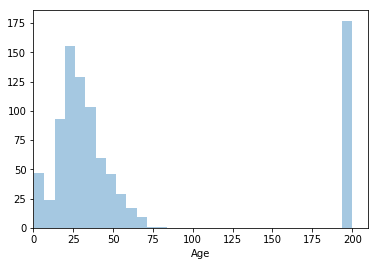

In [13]:
sns.distplot(train_data.Age.fillna(value=200), kde=False);
plt.xlim([0, None]);

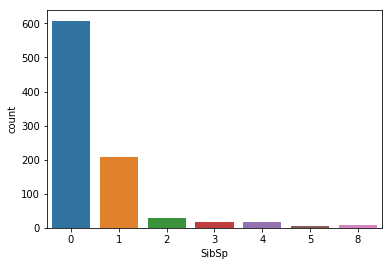

In [14]:
sns.countplot(train_data.SibSp.fillna(value='missing'));

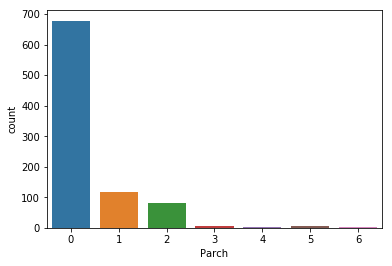

In [15]:
sns.countplot(train_data.Parch.fillna(value='missing'));

/home/diego/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


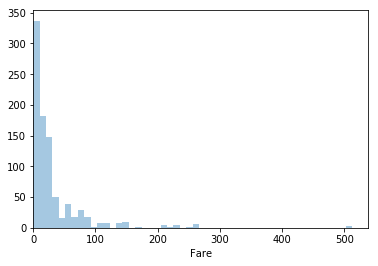

In [16]:
sns.distplot(train_data.Fare.fillna(value=600), kde=False);
plt.xlim([0, None]);

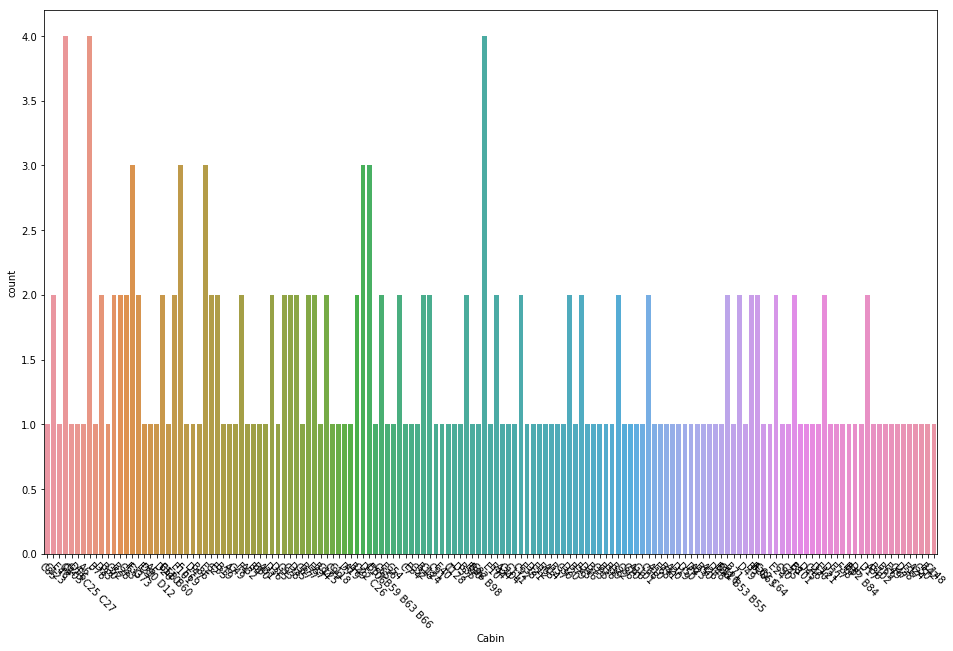

In [17]:
plt.figure(figsize=(16,10))
# sns.countplot(X_train.Cabin.fillna(value='missing'))
sns.countplot(train_data.Cabin)
plt.xticks(rotation=-45);

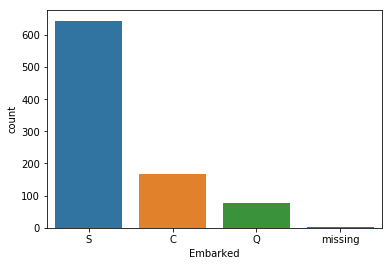

In [18]:
sns.countplot(train_data.Embarked.fillna(value='missing'));

### Correlations of single features to target variable

In [19]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [22]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


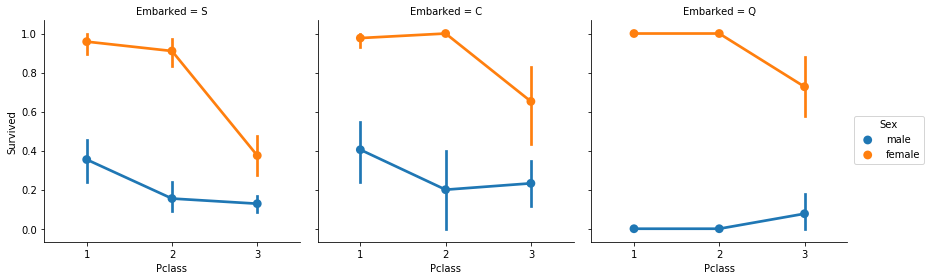

In [24]:
sns.factorplot(x='Pclass',
               y='Survived',
               hue='Sex', col='Embarked', data=train_data,
               kind='point')

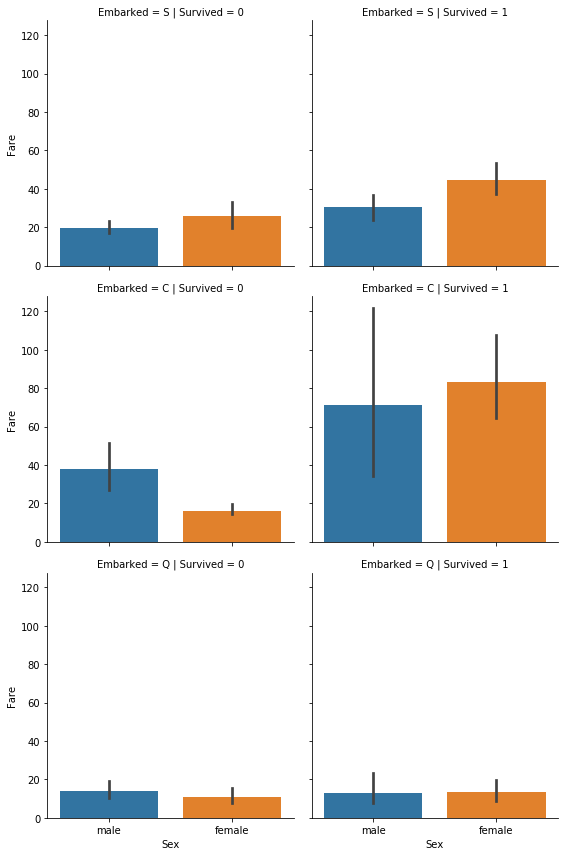

In [25]:
sns.factorplot(x='Sex',
               y='Fare',
#                hue='Sex',
               row= 'Embarked',
               col='Survived', data=train_data,
               kind='bar');

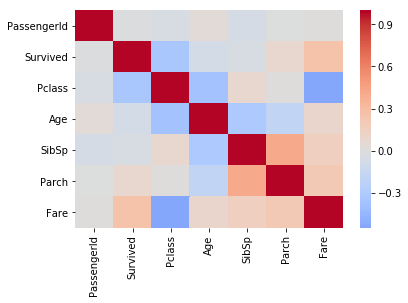

In [26]:
corr = train_data.select_dtypes(include='number').corr()
sns.heatmap(corr, center=0, cmap='coolwarm');

<Figure size 360x144 with 0 Axes>

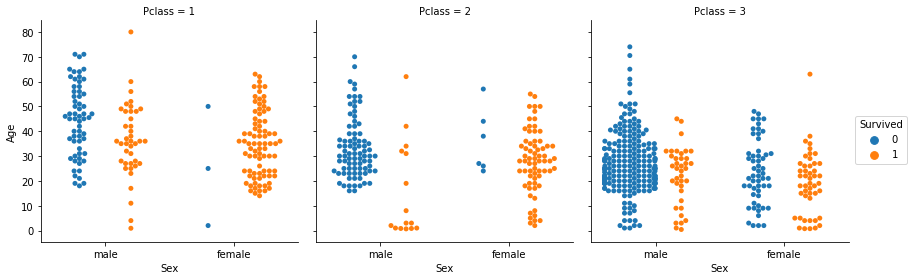

In [27]:
plt.figure(figsize=(5,2));
sns.factorplot(x='Sex', y='Age',
               hue='Survived', col='Pclass', data=train_data,
               kind='swarm', dodge=True);

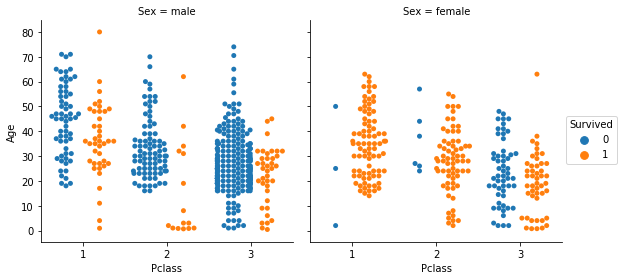

In [28]:
sns.factorplot(x='Pclass',
               y='Age',
               hue='Survived', col='Sex', data=train_data,
               kind='swarm', dodge=True);

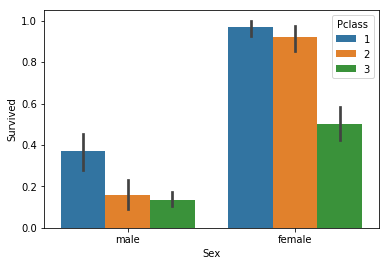

In [29]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_data);

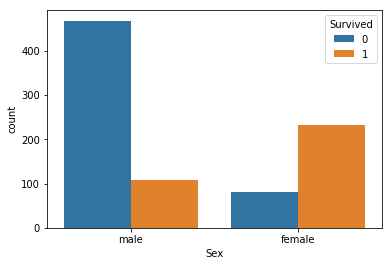

In [30]:
sns.countplot(x='Sex', hue='Survived', data=train_data);

<Figure size 360x144 with 0 Axes>

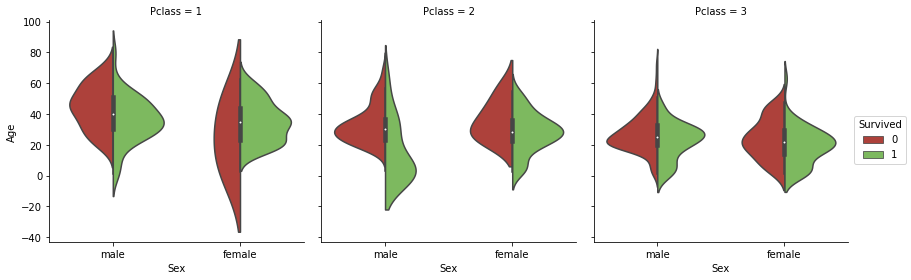

In [31]:
plt.figure(figsize=(5,2))
sns.factorplot(x='Sex', y='Age',
               hue='Survived', col='Pclass', data=train_data,
               kind='violin', split=True,
               palette=['#C03028', '#78C850']);

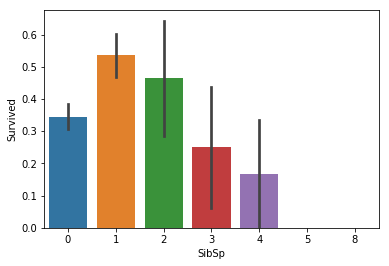

In [32]:
#SibSp, Parch
sns.barplot(x='SibSp', y='Survived', data=train_data);

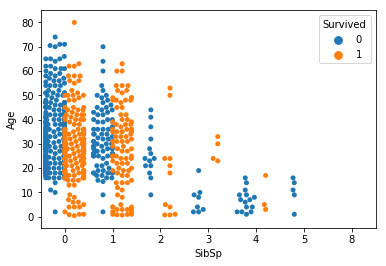

In [33]:
sns.swarmplot(x='SibSp', y='Age',
               hue='Survived', data=train_data, dodge=True);

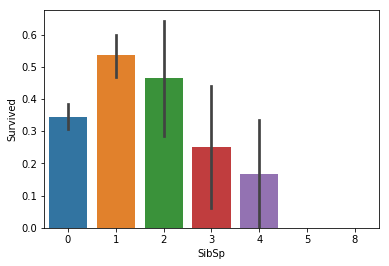

In [34]:
#SibSp, Parch
sns.barplot(x='SibSp', y='Survived', data=train_data)

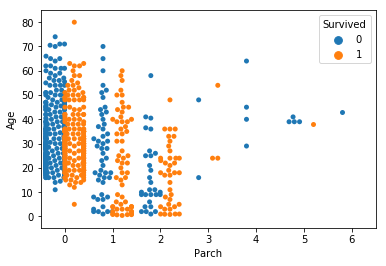

In [35]:
sns.swarmplot(x='Parch', y='Age',
               hue='Survived', data=train_data, dodge=True)

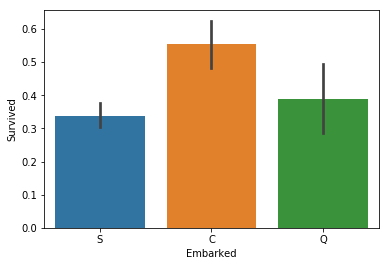

In [36]:
sns.barplot(x='Embarked', y='Survived', data=train_data, dodge=True);

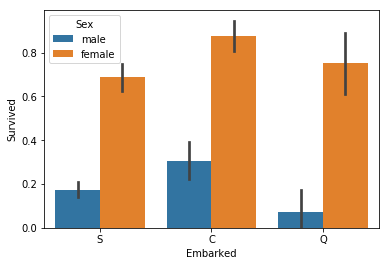

In [37]:
sns.barplot(x='Embarked', y='Survived', hue='Sex',data=train_data, dodge=True);

## 4. Data cleaning

In [38]:
## drop non-correlated features 
train_df = train_data.drop(['PassengerId'], axis=1)
test_df = test_data.copy() # keep PassengerId for now, for submission
data_dfs = [train_df, test_df]

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [42]:
# remove NaN: Age, Cabin, Embarked
for df in data_dfs:
    df['AgeMissing'] = df.Age.isna().astype(int)
    df.Age.fillna(value=0, inplace=True)
#     df.Age= df.Age.fillna(data.Age.median(), inplace=True)
    df.Fare.fillna(value=0, inplace=True)
    df.Cabin.fillna(value='missing', inplace=True)
    df.dropna(subset=['Embarked'], inplace=True)
# X_train['AgeMissing'] = X_train.Age.isna()
# X_train.Age.fillna(value=0, inplace=True)
# X_train.Cabin.fillna(value='missing', inplace=True)
# X_train.Embarked.fillna(value='missing', inplace=True)

# X_test['AgeMissing'] = X_test.Age.isna()
# X_test.Age.fillna(value=0, inplace=True)
# X_test.Cabin.fillna(value='missing', inplace=True)
# X_test.Embarked.fillna(value='missing', inplace=True)

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
Survived      889 non-null int64
Pclass        889 non-null int64
Name          889 non-null object
Sex           889 non-null object
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Ticket        889 non-null object
Fare          889 non-null float64
Cabin         889 non-null object
Embarked      889 non-null object
AgeMissing    889 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


## Feature Engineering

In [44]:
# drop features
# for df in data_dfs: 
#     df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [45]:
# replace name and ticket by its length
for df in data_dfs: 
    df['NameLen'] = df['Name'].str.len()
    df['TicketLen'] = df['Ticket'].str.len()

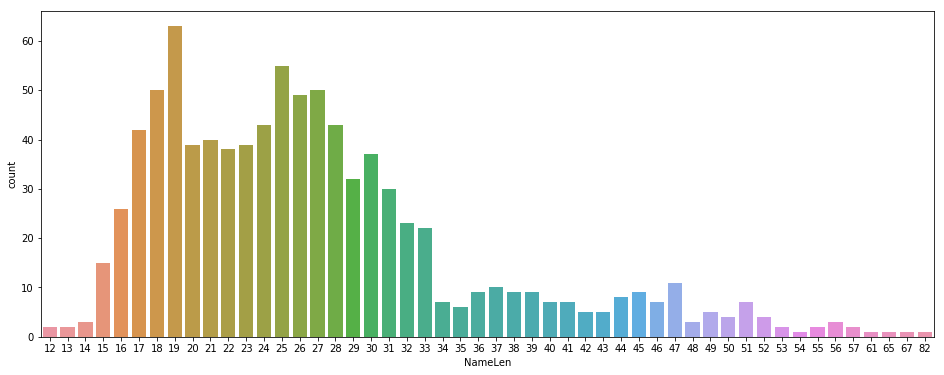

In [46]:
plt.figure(figsize=(16, 6))
sns.countplot('NameLen', data=train_df);

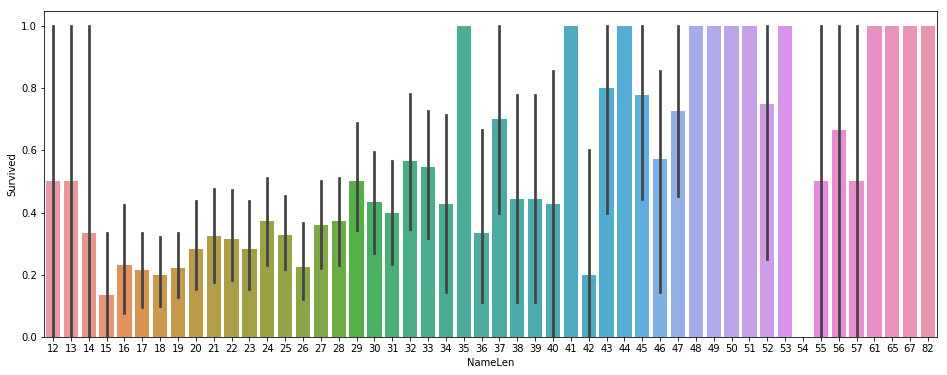

In [47]:
plt.figure(figsize=(16, 6))
sns.barplot(x='NameLen', y='Survived', data=train_df);

In [48]:
# for df in data_dfs: 
# #     df['NameLength'] = pd.cut(df.NameLength, bins=[0,15,30,45,100], labels=False) # group in bins

# df['NameLength'] = pd.cut(df['NameLength'], 5)

for df in data_dfs:    
    df.loc[ df['NameLen'] <= 20, 'NameLen'] = 0
    df.loc[(df['NameLen'] > 20) & (df['NameLen'] <= 30), 'NameLen'] = 1
    df.loc[(df['NameLen'] > 30) & (df['NameLen'] <= 40), 'NameLen'] = 2
    df.loc[(df['NameLen'] > 40), 'NameLen'] = 3

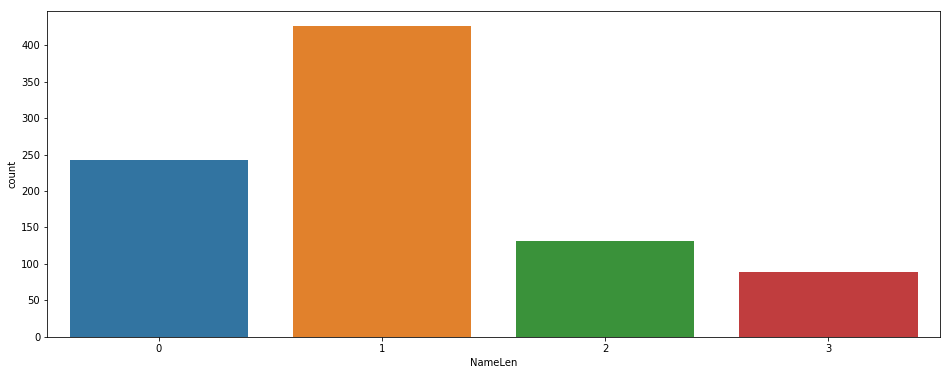

In [49]:
plt.figure(figsize=(16, 6))
sns.countplot('NameLen', data=train_df);

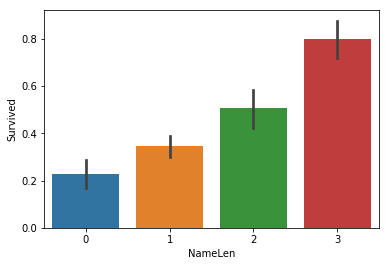

In [50]:
sns.barplot(x='NameLen', y='Survived', data=train_df);

In [51]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeMissing,NameLen,TicketLen
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,0,1,9
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,3,8
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,0,1,16
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3,6
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,0,1,6


In [52]:
for df in data_dfs:
    df.drop(['Name'], axis=1, inplace=True)

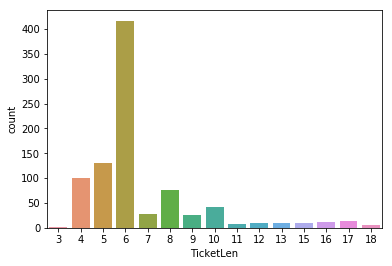

In [53]:
sns.countplot('TicketLen', data=train_df);

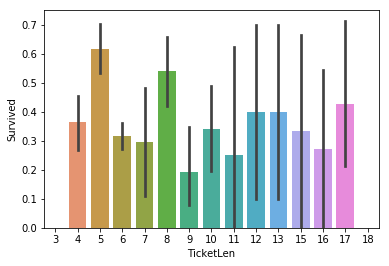

In [54]:
sns.barplot(x='TicketLen', y='Survived', data=train_df);

In [55]:
for df in data_dfs:    
    df.loc[ df['TicketLen'] <= 5, 'TicketLen'] = 0
    df.loc[(df['TicketLen'] > 5) & (df['TicketLen'] <= 10), 'TicketLen'] = 1
    df.loc[(df['TicketLen'] > 10), 'TicketLen'] = 2
# X_train['TicketLength'] = pd.cut(X_train.TicketLength, bins=[0,5,7,20], labels=False) 
# X_test['TicketLength'] = pd.cut(X_test.TicketLength, bins=[0,5,7,20], labels=False) 

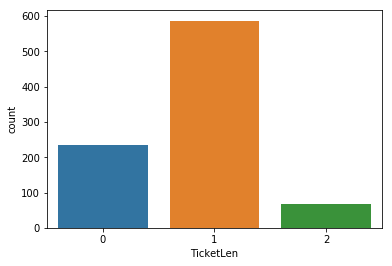

In [56]:
sns.countplot('TicketLen', data=train_df);

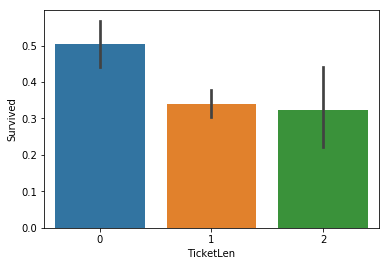

In [57]:
sns.barplot(x='TicketLen', y='Survived', data=train_df);

In [58]:
# Ticket and TicketLen features seems uncorrelated to target, drop it:
for df in data_dfs:
    df.drop(['Ticket', 'TicketLen'], axis=1, inplace=True)

In [59]:
# # simplify cabin feature to boolean
for df in data_dfs:
    df['hasCabin'] = (df['Cabin'] != 'missing').astype(int)
#     df['Cabin'] = df['Cabin'].str[0]

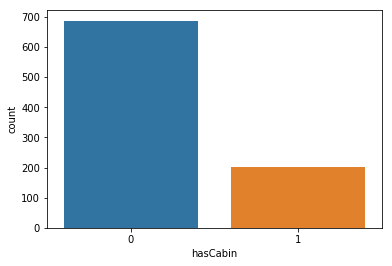

In [60]:
sns.countplot('hasCabin', data=train_df);

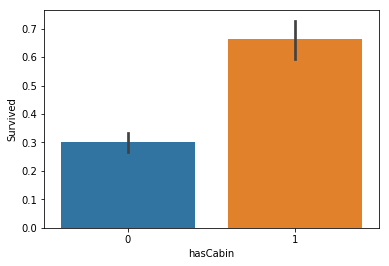

In [61]:
sns.barplot(x='hasCabin', y='Survived', data=train_df);

In [62]:
for df in data_dfs:
    df.drop(['Cabin'], axis=1, inplace=True)

In [63]:
for df in data_dfs:
    df['isFemale'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    df.drop(['Sex'], axis=1, inplace=True)
    
for df in data_dfs:
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q':2} ).astype(int)

In [64]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,AgeMissing,NameLen,hasCabin,isFemale
0,0,3,22.0,1,0,7.2500,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,3,1,1
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,3,1,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0


## Algorithm selection

In [178]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn import preprocessing
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV
import pprint as pp

In [134]:
y_train = train_df['Survived']
X_train = train_df.drop(['Survived'], axis=1)
X_test = test_df
passengerIds = X_test['PassengerId']
X_test = X_test.drop(['PassengerId'], axis=1)
X_train.shape, y_train.shape, X_test.shape

((889, 10), (889,), (418, 10))

In [135]:
def report(results, n_top=2):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters:")
            pp.pprint(results['params'][candidate])
            print("")

### Random Forests

In [194]:
# hyperparameters = dict(randomforestclassifier__criterion=['gini','entropy'],
#                        randomforestclassifier__n_estimators=[100, 250, 500, 1000],
#                        randomforestclassifier__max_features=['auto', 'sqrt', 'log2'],
#                        randomforestclassifier__min_samples_split=[2, 4, 6, 8],
#                        randomforestclassifier__min_samples_leaf=[1, 3, 5, 8],
#                        randomforestclassifier__max_depth=[None, 3, 5, 10])

param_dist = dict(randomforestclassifier__max_depth=[3, None],
                  randomforestclassifier__max_features=sp_randint(1, 11),
                  randomforestclassifier__min_samples_split=sp_randint(2, 11),
                  randomforestclassifier__min_samples_leaf=sp_randint(1, 11),
                  randomforestclassifier__bootstrap=[True, False],
                  randomforestclassifier__criterion=["gini", "entropy"]
                 )
pipeline = make_pipeline(preprocessing.StandardScaler(),
                         RandomForestClassifier(n_estimators=250)
                        )
# clf0 = GridSearchCV(estimator=pipeline,
#                    param_grid=hyperparameters,
#                    verbose=1,
#                    n_jobs=4,
#                    cv=5)

clf0 = RandomizedSearchCV(pipeline,
                         param_distributions=param_dist,
                         n_iter=40,
                         n_jobs=4,
                         cv=5,
                         verbose=1)

In [195]:
clf0.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   19.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   19.8s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid=True, n_iter=40, n_jobs=4,
          param_distributions={'randomforestclassifier__max_depth': [3, None], 'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f60013c49e8>, 'randomforestclassifier__min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f60013c4a58>, 'r...restclassifier__bootstrap': [True, False], 'randomforestclassifier__criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_

In [196]:
report(clf0.cv_results_)
print("Best model score on whole training set: {0:.3f}".format(clf0.score(X_train, y_train)))

Model with rank: 1
Mean validation score: 0.820 (std: 0.028)
Parameters:
{'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 7,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.816 (std: 0.016)
Parameters:
{'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 2,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__min_samples_split': 3}

Best model score on whole training set: 0.900


### Logistic Regression

In [146]:
param_dist = dict(logisticregression__penalty=['l1', 'l2'],
                  logisticregression__C=[0.001,0.01,0.1,1,10,100],
#                   logisticregression__tol=[1e-5, 1e-4, 1e-3, 1e-2],
                 )

pipeline = make_pipeline(preprocessing.StandardScaler(),
                         LogisticRegression()
                        )

clf1 = RandomizedSearchCV(pipeline,
                         param_distributions=param_dist,
                         n_iter=12,
                         n_jobs=4,
                         cv=5,
                         verbose=1)

In [147]:
clf1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=12, n_jobs=4,
          param_distributions={'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [148]:
report(clf1.cv_results_)
print("Best model score on whole training set: {0:.3f}".format(clf1.score(X_train, y_train)))

Model with rank: 1
Mean validation score: 0.794 (std: 0.012)
Parameters:
{'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.012)
Parameters:
{'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.012)
Parameters:
{'logisticregression__C': 100, 'logisticregression__penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.012)
Parameters:
{'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}

Best model score on whole training set: 0.805


### SVM

In [160]:
param_dist = dict(svc__kernel=['linear', 'rbf', 'poly', 'sigmoid'],
                  svc__C=[0.01,0.1,1,10,100],
                  svc__gamma=[0.001, 0.01,0.1,1],
                 )

pipeline = make_pipeline(preprocessing.StandardScaler(),
                         SVC()
                        )

clf2 = RandomizedSearchCV(pipeline,
                         param_distributions=param_dist,
                         n_iter=40,
                         n_jobs=4,
                         cv=5,
                         verbose=2)

In [161]:
clf2.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] svc__kernel=sigmoid, svc__gamma=0.001, svc__C=10 ................
[CV] svc__kernel=sigmoid, svc__gamma=0.001, svc__C=10 ................
[CV] svc__kernel=sigmoid, svc__gamma=0.001, svc__C=10 ................
[CV] svc__kernel=sigmoid, svc__gamma=0.001, svc__C=10 ................
[CV] . svc__kernel=sigmoid, svc__gamma=0.001, svc__C=10, total=   0.0s
[CV] svc__kernel=sigmoid, svc__gamma=0.001, svc__C=10 ................
[CV] . svc__kernel=sigmoid, svc__gamma=0.001, svc__C=10, total=   0.0s
[CV] svc__kernel=linear, svc__gamma=1, svc__C=0.01 ...................
[CV] . svc__kernel=sigmoid, svc__gamma=0.001, svc__C=10, total=   0.0s
[CV] svc__kernel=linear, svc__gamma=1, svc__C=0.01 ...................
[CV] . svc__kernel=sigmoid, svc__gamma=0.001, svc__C=10, total=   0.0s
[CV] . svc__kernel=sigmoid, svc__gamma=0.001, svc__C=10, total=   0.0s
[CV] svc__kernel=linear, svc__gamma=1, svc__C=0.01 ...................
[CV] svc__kerne

[CV] svc__kernel=sigmoid, svc__gamma=0.01, svc__C=10 .................
[CV] .. svc__kernel=sigmoid, svc__gamma=0.01, svc__C=10, total=   0.0s
[CV] svc__kernel=sigmoid, svc__gamma=0.01, svc__C=10 .................
[CV] .. svc__kernel=sigmoid, svc__gamma=0.01, svc__C=10, total=   0.0s
[CV] svc__kernel=sigmoid, svc__gamma=0.01, svc__C=10 .................
[CV] .. svc__kernel=sigmoid, svc__gamma=0.01, svc__C=10, total=   0.0s
[CV] svc__kernel=sigmoid, svc__gamma=0.01, svc__C=10 .................
[CV] .. svc__kernel=sigmoid, svc__gamma=0.01, svc__C=10, total=   0.0s
[CV] svc__kernel=rbf, svc__gamma=0.01, svc__C=0.01 ...................
[CV] ........ svc__kernel=poly, svc__gamma=1, svc__C=10, total=   1.3s
[CV] svc__kernel=rbf, svc__gamma=0.01, svc__C=0.01 ...................
[CV] .... svc__kernel=rbf, svc__gamma=0.01, svc__C=0.01, total=   0.0s
[CV] svc__kernel=rbf, svc__gamma=0.01, svc__C=0.01 ...................
[CV] .... svc__kernel=rbf, svc__gamma=0.01, svc__C=0.01, total=   0.0s
[CV] s

[CV] svc__kernel=rbf, svc__gamma=1, svc__C=0.01 ......................
[CV] .... svc__kernel=poly, svc__gamma=0.001, svc__C=10, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=0.01 ...................
[CV] .... svc__kernel=poly, svc__gamma=0.1, svc__C=0.01, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=0.01 ...................
[CV] ....... svc__kernel=rbf, svc__gamma=1, svc__C=0.01, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.001, svc__C=10 ...................
[CV] .... svc__kernel=poly, svc__gamma=0.1, svc__C=0.01, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=0.01 ...................
[CV] .... svc__kernel=poly, svc__gamma=0.001, svc__C=10, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.001, svc__C=10 ...................
[CV] .... svc__kernel=poly, svc__gamma=0.1, svc__C=0.01, total=   0.0s
[CV] .... svc__kernel=poly, svc__gamma=0.001, svc__C=10, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=0.01 ...................
[CV] s

[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=0.1 ....................
[CV] .. svc__kernel=linear, svc__gamma=0.01, svc__C=0.1, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=0.1 ....................
[CV] ..... svc__kernel=poly, svc__gamma=0.1, svc__C=0.1, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=0.1 ....................
[CV] ..... svc__kernel=poly, svc__gamma=0.1, svc__C=0.1, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=0.1 ....................
[CV] ..... svc__kernel=poly, svc__gamma=0.1, svc__C=0.1, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=0.1 ....................
[CV] ..... svc__kernel=poly, svc__gamma=0.1, svc__C=0.1, total=   0.0s
[CV] svc__kernel=rbf, svc__gamma=1, svc__C=0.1 .......................
[CV] ..... svc__kernel=poly, svc__gamma=0.1, svc__C=0.1, total=   0.0s
[CV] svc__kernel=rbf, svc__gamma=1, svc__C=0.1 .......................
[CV] ........ svc__kernel=rbf, svc__gamma=1, svc__C=0.1, total=   0.0s
[CV] s

[Parallel(n_jobs=4)]: Done 158 tasks      | elapsed:    3.7s


[CV] . svc__kernel=linear, svc__gamma=0.001, svc__C=100, total=   0.6s
[CV] svc__kernel=linear, svc__gamma=0.001, svc__C=100 ................
[CV] ........ svc__kernel=rbf, svc__gamma=1, svc__C=0.1, total=   0.0s
[CV] svc__kernel=rbf, svc__gamma=1, svc__C=0.1 .......................
[CV] ........ svc__kernel=rbf, svc__gamma=1, svc__C=0.1, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=1 ......................
[CV] ........ svc__kernel=rbf, svc__gamma=1, svc__C=0.1, total=   0.0s
[CV] svc__kernel=rbf, svc__gamma=1, svc__C=0.1 .......................
[CV] ....... svc__kernel=poly, svc__gamma=0.1, svc__C=1, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=1 ......................
[CV] ....... svc__kernel=poly, svc__gamma=0.1, svc__C=1, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=1 ......................
[CV] ........ svc__kernel=rbf, svc__gamma=1, svc__C=0.1, total=   0.0s
[CV] svc__kernel=poly, svc__gamma=0.1, svc__C=1 ......................
[CV] .

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   37.1s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
          fit_params=None, iid=True, n_iter=40, n_jobs=4,
          param_distributions={'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'svc__C': [0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [163]:
report(clf2.cv_results_, 3)
print("Best model score on whole training set: {0:.3f}".format(clf2.score(X_train, y_train)))

Model with rank: 1
Mean validation score: 0.820 (std: 0.020)
Parameters:
{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Model with rank: 2
Mean validation score: 0.804 (std: 0.011)
Parameters:
{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.799 (std: 0.032)
Parameters:
{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}

Best model score on whole training set: 0.845


### Boosted Trees

In [174]:
param_dist = dict(adaboostclassifier__learning_rate=[0.01, 0.1, 0.5, 1.0],
                  adaboostclassifier__n_estimators=[50, 100, 250, 500],
                 )

pipeline = make_pipeline(preprocessing.StandardScaler(),
                         AdaBoostClassifier()
                        )

clf3 = GridSearchCV(pipeline,
                     param_grid=param_dist,
                     n_jobs=4,
                     cv=5,
                     verbose=2)

In [175]:
clf3.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_estimators=50 
[CV] adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_estimators=50 
[CV] adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_estimators=50 
[CV] adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_estimators=50 
[CV]  adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_estimators=50, total=   0.1s
[CV] adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_estimators=50 
[CV]  adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_estimators=50, total=   0.1s
[CV] adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_estimators=100 
[CV]  adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_estimators=50, total=   0.1s
[CV] adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_estimators=100 
[CV]  adaboostclassifier__learning_rate=0.01, adaboostclassifier__n_esti

[CV] adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=100 
[CV]  adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=100, total=   0.2s
[CV] adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=100 
[CV]  adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=100, total=   0.2s
[CV] adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=250 
[CV]  adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=100, total=   0.2s
[CV] adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=100 
[CV]  adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=100, total=   0.2s
[CV] adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=250 
[CV]  adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=250, total=   0.4s
[CV] adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=250 
[CV]  adaboostclassifie

[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    5.8s


[CV]  adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=500, total=   0.8s
[CV] adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=500 
[CV]  adaboostclassifier__learning_rate=1.0, adaboostclassifier__n_estimators=100, total=   0.2s
[CV] adaboostclassifier__learning_rate=1.0, adaboostclassifier__n_estimators=100 
[CV]  adaboostclassifier__learning_rate=0.5, adaboostclassifier__n_estimators=500, total=   0.8s
[CV] adaboostclassifier__learning_rate=1.0, adaboostclassifier__n_estimators=100 
[CV]  adaboostclassifier__learning_rate=1.0, adaboostclassifier__n_estimators=100, total=   0.2s
[CV] adaboostclassifier__learning_rate=1.0, adaboostclassifier__n_estimators=100 
[CV]  adaboostclassifier__learning_rate=1.0, adaboostclassifier__n_estimators=100, total=   0.2s
[CV] adaboostclassifier__learning_rate=1.0, adaboostclassifier__n_estimators=100 
[CV]  adaboostclassifier__learning_rate=1.0, adaboostclassifier__n_estimators=100, total=   0.2s
[CV] ada

[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    8.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'adaboostclassifier__learning_rate': [0.01, 0.1, 0.5, 1.0], 'adaboostclassifier__n_estimators': [50, 100, 250, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [176]:
report(clf3.cv_results_, 3)
print("Best model score on whole training set: {0:.3f}".format(clf3.score(X_train, y_train)))

Model with rank: 1
Mean validation score: 0.816 (std: 0.023)
Parameters:
{'adaboostclassifier__learning_rate': 1.0,
 'adaboostclassifier__n_estimators': 500}

Model with rank: 2
Mean validation score: 0.810 (std: 0.022)
Parameters:
{'adaboostclassifier__learning_rate': 1.0,
 'adaboostclassifier__n_estimators': 250}

Model with rank: 3
Mean validation score: 0.802 (std: 0.014)
Parameters:
{'adaboostclassifier__learning_rate': 0.5,
 'adaboostclassifier__n_estimators': 100}

Best model score on whole training set: 0.861


### MLP

In [188]:
param_dist = dict(mlpclassifier__hidden_layer_sizes=[[5]*3, [7]*3, [10]*3],
#                   mlpclassifier__solver=['lbfgs', 'sgd', adam'],
                  mlpclassifier__alpha=[1e-5, 1e-4, 1e-3, 1e-2],
                  mlpclassifier__beta_1=[0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
                  mlpclassifier__beta_2=[0.5, 0.9, 0.95, 0.999],
                  mlpclassifier__epsilon=[1e-9, 1e-8, 1e-7, 1e-6],
                  mlpclassifier__max_iter=[300, 400, 500],
                  mlpclassifier__learning_rate_init=[1e-4, 1e-3, 1e-2],
                 )

pipeline = make_pipeline(preprocessing.StandardScaler(),
                         MLPClassifier()
                        )

clf4 = RandomizedSearchCV(pipeline,
                         param_distributions=param_dist,
                         n_iter=40,
                         n_jobs=4,
                         cv=5,
                         verbose=2)

In [189]:
clf4.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=1e-05 
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=1e-05 
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=1e-05 
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=1e-05, total=   1.6s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=1e-05, total=   1.9s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=1e-05, total=   1.9s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=1e-05, total=   2.1s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=1e-05, total=   1.8s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001, total=   1.6s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=50

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001, total=   2.5s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001, total=   2.6s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001, total=   2.9s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001, total=   3.3s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01, total=   2.2s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01, total=   2.3s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01, total=   2.7s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001, total=   3.3s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=1e-05, total=   1.6s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=1e-05 
[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01, total=   2.1s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=1e-05 
[CV]  mlpclassifier__max_iter=5

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01, total=   2.6s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=1e-05, total=   1.7s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_it

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.6s


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001, total=   1.0s
[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001, total=   1.5s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001, total=   3.4s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001, total=   3.1s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001, total=   3.3s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001, total=   4.3s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 
[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001, total=   0.6s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 
[CV]  mlpclassifier__max_iter=300, ml

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05, total=   2.6s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05, total=   2.9s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05, total=   3.3s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001, total=   1.5s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05, total=   2.7s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05, total=   3.0s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001, total=   2.5s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001, total=   1.6s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01, total=   0.5s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001, total=   2.1s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01, total=   0.4s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclass

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.0001, total=   2.6s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001, total=   0.3s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001, total=   2.0s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001, total=   2.2s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001, total=   2.1s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.01, total=   0.9s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.001, total=   1.7s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.01, total=   1.2s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=300, 

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.01, total=   2.6s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.01, total=   2.0s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=500,

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001, total=   3.6s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001, total=   2.7s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001, total=   3.5s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001, total=   4.3s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   1.8s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   2.1s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   2.5s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001, total=   3.7s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   1.9s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   1.9s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05, total=   2.2s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05, total=   1.9s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05, total=   2.2s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05, total=   1.9s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=1e-05, total=   2.3s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.0001, total=   2.2s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.0001, total=   2.5s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.0001, total=   2.8s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.0001, total=   2.1s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.0001, total=   3.3s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   3.5s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   3.4s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   3.2s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   4.2s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   3.3s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001, total=   3.4s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001, total=   3.8s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001, total=   2.9s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001, total=   3.5s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.001, total=   3.5s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   3.2s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   2.9s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   3.3s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   4.3s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.0001, total=   2.9s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   3.8s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.0001, total=   4.1s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.0001, total=   3.3s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.0001, total=   3.4s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.0001, total=   4.1s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.0001, total=   2.2s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.0001, total=   1.9s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.0001, total=   2.4s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.0001, total=   2.2s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.3, mlpclassifier__alpha=0.0001, total=   2.5s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=1e-05, total=   3.6s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=1e-05 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=1e-05, total=   3.2s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001, total=   0.5s
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=1e-05, total=   3.6s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001 
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=500

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=1e-05, total=   3.5s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.001, total=   0.2s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001 
[CV]  mlpclassifier__max_iter=500

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=1e-05, total=   3.4s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001, total=   2.8s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001, total=   3.0s
[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001, total=   1.1s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001, total=   3.7s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.001, total=   2.5s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   2.8s
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   3.4s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   3.7s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   1.9s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   1.9s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   2.6s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   4.0s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   1.9s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01, total=   1.0s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   1.4s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.001, total=   2.1s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01, total=   0.7s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclas

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01, total=   0.3s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01, total=   0.7s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[10, 10, 10], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.7, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=300, mlpcl

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   1.1s
[CV] mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   2.1s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   2.3s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   2.3s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01, total=   0.3s
[CV] mlpclassifier__max_iter=400, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-09, mlpclassifier__beta_2=0.95, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=400, mlpclass

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=300, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-08, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.1, mlpclassifier__alpha=0.0001, total=   2.1s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01, total=   2.7s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01, total=   3.4s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01, total=   0.6s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01, total=   3.8s
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01, total=   0.2s


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01 
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01, total=   4.1s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.01, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.5, mlpclassifier__beta_1=0.5, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_r

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01, total=   3.9s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01, total=   1.7s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.001, mlpclassifier__hidden_layer_sizes=[5, 5, 5], mlpclassifier__epsilon=1e-06, mlpclassifier__beta_2=0.999, mlpclassifier__beta_1=0.9, mlpclassifier__alpha=0.01 
[CV]  mlpclassifier__max_iter=500, m

/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01, total=   3.1s
[CV] mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01 


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01, total=   3.5s


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01, total=   3.0s


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01, total=   2.2s


/home/diego/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlpclassifier__max_iter=500, mlpclassifier__learning_rate_init=0.0001, mlpclassifier__hidden_layer_sizes=[7, 7, 7], mlpclassifier__epsilon=1e-07, mlpclassifier__beta_2=0.9, mlpclassifier__beta_1=0.01, mlpclassifier__alpha=0.01, total=   2.4s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
          fit_params=None, iid=True, n_iter=40, n_jobs=4,
          param_distributions={'mlpclassifier__hidden_layer_sizes': [[5, 5, 5], [7, 7, 7], [10, 10, 10]], 'mlpclassifier__alpha': [1e-05, 0.0001, 0.001, 0.01], 'mlpclassifier__beta_1': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9], 'mlpclassifier__beta_2': [0.5, 0.9, 0.95, 0.999], 'mlpclassifier__epsilon': [1e-09, 1e-08, 1e-07, 1e-06], 'mlpclassifier__max_iter': [300, 400, 500], 'mlpclassifier__learning_rate_init': [0.0001, 0.001, 0.01]},
          pre_

In [190]:
report(clf4.cv_results_, 3)
print("Best model score on whole training set: {0:.3f}".format(clf4.score(X_train, y_train)))

Model with rank: 1
Mean validation score: 0.819 (std: 0.016)
Parameters:
{'mlpclassifier__alpha': 0.001,
 'mlpclassifier__beta_1': 0.7,
 'mlpclassifier__beta_2': 0.9,
 'mlpclassifier__epsilon': 1e-09,
 'mlpclassifier__hidden_layer_sizes': [10, 10, 10],
 'mlpclassifier__learning_rate_init': 0.01,
 'mlpclassifier__max_iter': 500}

Model with rank: 2
Mean validation score: 0.818 (std: 0.025)
Parameters:
{'mlpclassifier__alpha': 0.001,
 'mlpclassifier__beta_1': 0.3,
 'mlpclassifier__beta_2': 0.999,
 'mlpclassifier__epsilon': 1e-09,
 'mlpclassifier__hidden_layer_sizes': [5, 5, 5],
 'mlpclassifier__learning_rate_init': 0.001,
 'mlpclassifier__max_iter': 500}

Model with rank: 2
Mean validation score: 0.818 (std: 0.025)
Parameters:
{'mlpclassifier__alpha': 0.01,
 'mlpclassifier__beta_1': 0.7,
 'mlpclassifier__beta_2': 0.5,
 'mlpclassifier__epsilon': 1e-09,
 'mlpclassifier__hidden_layer_sizes': [10, 10, 10],
 'mlpclassifier__learning_rate_init': 0.01,
 'mlpclassifier__max_iter': 300}

Best mod

### Choose best model

In [198]:
clfs = [clf0, clf1, clf2, clf3, clf4]

In [202]:
for clf in clfs:
    print('')
    report(clf.cv_results_, 1)
    print("Best model score on whole training set: {0:.3f}".format(clf.score(X_train, y_train)))
    print('_' * 15)


Model with rank: 1
Mean validation score: 0.820 (std: 0.028)
Parameters:
{'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 7,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__min_samples_split': 10}

Best model score on whole training set: 0.900
_______________

Model with rank: 1
Mean validation score: 0.794 (std: 0.012)
Parameters:
{'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.012)
Parameters:
{'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.012)
Parameters:
{'logisticregression__C': 100, 'logisticregression__penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.794 (std: 0.012)
Parameters:
{'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}

Best model score 

### Make predictions on test data for submission

In [203]:
y_test_pred = clf4.predict(X_test)

In [204]:
predictions = pd.concat([passengerIds,
                         pd.DataFrame({'Survived':y_test_pred})],
                         axis=1)

In [205]:
predictions.to_csv('titanic_predictions.csv', index=False)